## Handling datasets with numerical and categorical features involves several steps to ensure the data is clean, consistent, and ready for modeling. Here’s a step-by-step guide:

### 1. Data Collection
- **Gather Data**: Ensure all relevant data is collected from various sources.

### 2. Data Inspection
- **Understand Data Structure**: Use functions like `head()`, `info()`, and `describe()` in pandas to understand the structure and summary statistics.
- **Check for Missing Values**: Use `isnull().sum()` to check for missing values.

### 3. Data  Cleaning
- **Handle Missing Values**: Depending on the nature of the data and the proportion of missing values, you can:
  - **Remove rows/columns** with missing values using `dropna()`.
  - **Impute missing values** using methods like mean, median, mode, or more sophisticated techniques like K-Nearest Neighbors (KNN).
    ```python
    df['numerical_feature'].fillna(df['numerical_feature'].mean(), inplace=True)
    df['categorical_feature'].fillna(df['categorical_feature'].mode()[0], inplace=True)
    ```
- **Remove Duplicates**: Use `drop_duplicates()` to remove duplicate rows.
- **Correct Data Types**: Ensure numerical features are of numeric type and categorical features are of object type.
  ```python
  df['numerical_feature'] = df['numerical_feature'].astype(float)
  df['categorical_feature'] = df['categorical_featurrical and categorical features and prepare them for building robust machine learning models.

### 4. Feature Engineering 
(CATEGORICAL VARIABLES)
- **Encoding Categorical Variables**:
  - **Label Encoding** for ordinal categories.
    ```python
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['ordinal_feature'] = le.fit_transform(df['ordinal_feature'])
    ```
  - **One-Hot Encoding** for nominal categories.
    ```python
    df = pd.get_dummies(df, columns=['nominal_feature'])
    ```

### 5. Handling Outliers
(NUMERICAL VARIABLES)
- **Detect Outliers**: Use visualization techniques like box plots or statistical methods like Z-scores.
  ```python
  df['z_score'] = (df['numerical_feature'] - df['numerical_feature'].mean()) / df['numerical_feature'].std()
  outliers = df[df['z_score'].abs() > 3]
  ```
- **Handle Outliers**: You can remove or transform outliers based on the context of your data.

### 6. Feature Selection
(NUMERICAL VARIABLES)
- **Correlation Analysis**: Use correlation matrices to identify highly correlated features.
  ```python
  import seaborn as sns
  correlation_matrix = df.corr()
  sns.heatmap(correlation_matrix, annot=True)
  ```
- **Feature Importance**: Use methods like feature importance from tree-based models or mutual information.

### 7. Splitting the Data
- **Train-Test Split**: Split the data into training and testing sets to evaluate model performance.
  ```python
  from sklearn.model_selection import train_test_split
  X = df.drop('target', axis=1)
  y = df['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  ```
### 8. Data Transformation
(X_train fit&transform @ X_test only transform)
- **Normalization/Standardization**:
  - **Normalization** (Min-Max Scaling) scales the data to a range of [0, 1].
    ```python
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df['numerical_feature'] = scaler.fit_transform(df[['numerical_feature']])
    ```
  - **Standardization** scales the data to have a mean of 0 and a standard deviation of 1.
    ```python
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df['numerical_feature'] = scaler.fit_transform(df[['numerical_feature']])
    ```
### 9. Model Building and Evaluation
- **Build and Evaluate Models**: Use various machine learning models and evaluate their performance using appropriate metrics.

### 10. Save Preprocessed Data and Model
- **Save Data**: Save the cleaned and preprocessed data for future use.
  ```python
  df.to_csv('cleaned_data.csv', index=False)
  ```
- **Save Model**: Save the trained model for deployment.
  ```python
  import joblib
  joblib.dump(model, 'model.pkl')
  ```

By following these steps, you can effectively handle datasets with numerical and categorical features and prepare them for building robust machine learning models.

## 1)  Data Collection

In [405]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\Downloads\loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## 2) Data Inspection

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [407]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [408]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [409]:
df.duplicated().sum()
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


## 3) Data Cleaning
No Null Values , No duplicate rows , Numerical feautres are int type and categorical feautres are of object type 

## 4) Feautre Engineering ( Categorical - Ordinal / Nominal Features)

In [410]:
import pandas as pd
def print_unique_categorical_values(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    df[categorical_columns].apply(lambda col: print(f"Unique values in '{col.name}': {col.unique()}"))

# Call the function
print_unique_categorical_values(df)


Unique values in 'gender': ['Male' 'Female']
Unique values in 'occupation': ['Engineer' 'Teacher' 'Student' 'Manager' 'Accountant' 'Nurse' 'Lawyer'
 'Artist' 'IT' 'Doctor' 'Consultant' 'Analyst' 'Salesman' 'Marketing'
 'Architect' 'Designer' 'Pharmacist' 'Researcher' 'Professor' 'Pilot'
 'Receptionist' 'Banker' 'Writer' 'Chef' 'Veterinarian' 'Sales' 'HR'
 'Electrician' 'Realtor' 'Photographer' 'Editor' 'Programmer' 'Dentist'
 'Musician' 'Psychologist' 'Server' 'Software' 'Stylist']
Unique values in 'education_level': ["Bachelor's" "Master's" 'High School' "Associate's" 'Doctoral']
Unique values in 'marital_status': ['Married' 'Single']
Unique values in 'loan_status': ['Approved' 'Denied']


In [411]:
## Handling Ordinal Categorical Variables Where Order matters 
import pandas as pd
education_mapping = {"High School": 0, "Associate's": 1, "Bachelor's": 2, "Master's": 3, "Doctoral": 4}
df['education_level'] = df['education_level'].replace(education_mapping)
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,2,Married,85000,720,Approved
1,45,Female,Teacher,3,Single,62000,680,Approved
2,28,Male,Student,0,Single,25000,590,Denied
3,51,Female,Manager,2,Married,105000,780,Approved
4,36,Male,Accountant,2,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,3,Married,100000,770,Approved
57,25,Female,Receptionist,0,Single,32000,570,Denied
58,43,Male,Banker,2,Married,95000,760,Approved
59,30,Female,Writer,3,Single,55000,650,Approved


In [412]:
## Handling Categorical Nominal Feautres
nominal_features=["gender", "occupation", "marital_status"]
df = pd.get_dummies(df, columns=nominal_features)
df

,age,education_level,income,credit_score,loan_status,gender_Female,gender_Male,occupation_Accountant,occupation_Analyst,occupation_Architect,...,occupation_Salesman,occupation_Server,occupation_Software,occupation_Student,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,marital_status_Married,marital_status_Single
0,32,2,85000,720,Approved,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,45,3,62000,680,Approved,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,28,0,25000,590,Denied,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,51,2,105000,780,Approved,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,36,2,75000,710,Approved,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,39,3,100000,770,Approved,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
57,25,0,32000,570,Denied,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
58,43,2,95000,760,Approved,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,30,3,55000,650,Approved,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [413]:
## Handling Target Categorical variable
import pandas as pd
loan_status_mapping = {"Denied": 0, "Approved": 1}
df['loan_status'] = df['loan_status'].replace(loan_status_mapping)
df

,age,education_level,income,credit_score,loan_status,gender_Female,gender_Male,occupation_Accountant,occupation_Analyst,occupation_Architect,...,occupation_Salesman,occupation_Server,occupation_Software,occupation_Student,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,marital_status_Married,marital_status_Single
0,32,2,85000,720,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,45,3,62000,680,1,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,28,0,25000,590,0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,51,2,105000,780,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,36,2,75000,710,1,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,39,3,100000,770,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
57,25,0,32000,570,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
58,43,2,95000,760,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59,30,3,55000,650,1,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


 ## 5) Data Transformation¶ (Numerical Feautres)

## Normalization:
Normalization scales the numerical features to a similar range, typically between 0 and 1.
It's useful when the features have different scales and you want to bring them to a common scale.
It's particularly beneficial for algorithms that rely on distance measures, such as k-nearest neighbors (KNN) and support vector machines (SVM).
Common normalization techniques include Min-Max scaling and Max Abs scacific range.

## Standardization:
Standardization transforms the numerical features to have a mean of 0 and a standard deviation of 1.
It centers the data around 0 and scales it to have unit variance.
It's useful when the features have different means and variances or when the algorithm assumes normally distributed features.
It's commonly used in algorithms like linear regression, logistic regression, and neural networks.
Standardization does not bound the data to a specific range.

## Choosing Between Normalization and Standardization:
If your features have different scales and you want to preserve the relative differences in the ranges of the features, use normalization (Min-Max scaling).
If your features have different means and variances and you want to standardize them to have a mean of 0 and a standard deviation of 1, use standardization (Z-score scaling).
Experiment with both techniques and evaluate the performance of your machine learning model using cross-validation or a hold-out dataset to determine which preprocessing method works best for your specific problem.

As we can see that mean between feautres age, income, and creditscore is very different so we are going with standardization

## 6) Handling Outliers


In [414]:
import pandas as pd
numerical_columns = ['age', 'income', 'credit_score']

# Calculate z-scores for each numerical column
z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
threshold = 3

# Identify rows with outliers in any numerical column
outliers = df[(z_scores.abs() > threshold).any(axis=1)]

# Remove rows with outliers
df_cleaned = df[(z_scores.abs() <= threshold).all(axis=1)]

print("DataFrame with Outliers:")
print(df)
print("\nDataFrame without Outliers:")
print(df_cleaned)
print("\nOutliers:")
print(outliers)


DataFrame with Outliers:
    age  education_level  income  credit_score  loan_status  gender_Female  \
0    32                2   85000           720            1          False   
1    45                3   62000           680            1           True   
2    28                0   25000           590            0          False   
3    51                2  105000           780            1           True   
4    36                2   75000           710            1          False   
..  ...              ...     ...           ...          ...            ...   
56   39                3  100000           770            1          False   
57   25                0   32000           570            0           True   
58   43                2   95000           760            1          False   
59   30                3   55000           650            1           True   
60   38                1   65000           700            1          False   

    gender_Male  occupation_Accountant

We found no outliers shape of df and df_cleaned are same

## 7) Feautre Selection

In [415]:
# Assuming you want to find the correlation between columns 'age', 'income', and 'credit_score'
selected_columns = ['age','credit_score','income']

# Calculate the correlation matrix for the selected columns only
selected_corr_matrix = df[selected_columns].corr()

# Display the correlation matrix as a table
print("Correlation Matrix for Selected Columns:")
print(selected_corr_matrix)


Correlation Matrix for Selected Columns:
                   age  credit_score    income
age           1.000000      0.806042  0.743184
credit_score  0.806042      1.000000  0.937983
income        0.743184      0.937983  1.000000


## Conclusion 

## Strong Positive Correlations:
There is a strong positive correlation between 'age' and 'credit_score' (0.806) as well as between 'age' and 'income' (0.743). This suggests that older individuals tend to have higher credit scores and higher incomes.
Similarly, there is a strong positive correlation between 'credit_score' and 'income' (0.938), indicating that individuals with higher credit scores tend to have higher incomes.

## Possible Multicollinearity:
The high correlations between 'credit_score' and 'income' (0.938) and between 'age' and 'credit_score' (0.806) suggest the possibility of multicollinearity. Multicollinearity can affect the performance and interpretability of models. To mitigate the effects of multicollinearity in classification models, you can consider the following approaches:ture.




1) Feature Selection: 
 Identify and remove highly correlated features from the dataset. Keeping only one of a pair of highly correlated features can reduce multicollinearity without sacrificing much predictive power.

2) Regularization: 
 Use regularization techniques such as Lasso (L1 regularization) or Ridge (L2 regularization) to penalize large coefficients and reduce their  sensitivity to multicollinearity.

3) Dimensionality Reduction: 
 Apply dimensionality reduction techniques such as Principal Component Analysis (PCA) or feature extraction methods to transform the original features into a lower-dimensional space while preserving most of the variance in the data.
 
4) Tree-Based Models: 
 Tree-based models like Decision Trees and Random Forests are less sensitive to multicollinearity compared to linear models. They can handle correlated features more effectively due to their hierarchical structure.


## 8) Split Data Set Train Test Split

In [416]:
import sklearn
from sklearn.model_selection import train_test_split
x = df.drop(columns=["loan_status"])
y=df["loan_status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [417]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

## 9) Model Building and Evaluation

In [419]:
y_pred=clf.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



## 10) Save Preprocessed Data and Model


In [420]:
##Save Data: Save the cleaned and preprocessed data for future use.
df.to_csv('cleaned_data.csv', index=False)
##Save Model: Save the trained model for deployment.
import joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']

In [421]:
import warnings

# Filter out DeprecationWarning and FutureWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## Data Visualization
Visualizing features is crucial for understanding their distribution, relationships, and potential anomalies. Here are some common visualizations for features along with detailed explanations and sample code using Python libraries like matplotlib and seaborn.

## --> For Numerical Feautres

## 1) Histograms 
(to check data distribution)

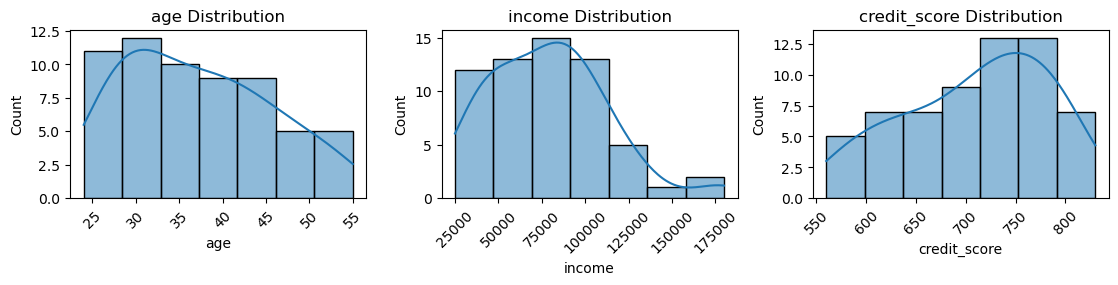

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms and KDE plots for numerical features
numerical_features = ['age','income','credit_score']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


Patterns such as whether the distribution is symmetric, skewed left, or skewed right.

## 2) Box Plot 
To check outliers
(min , max , 25th , 50th , 75th (percentiles) , max) 

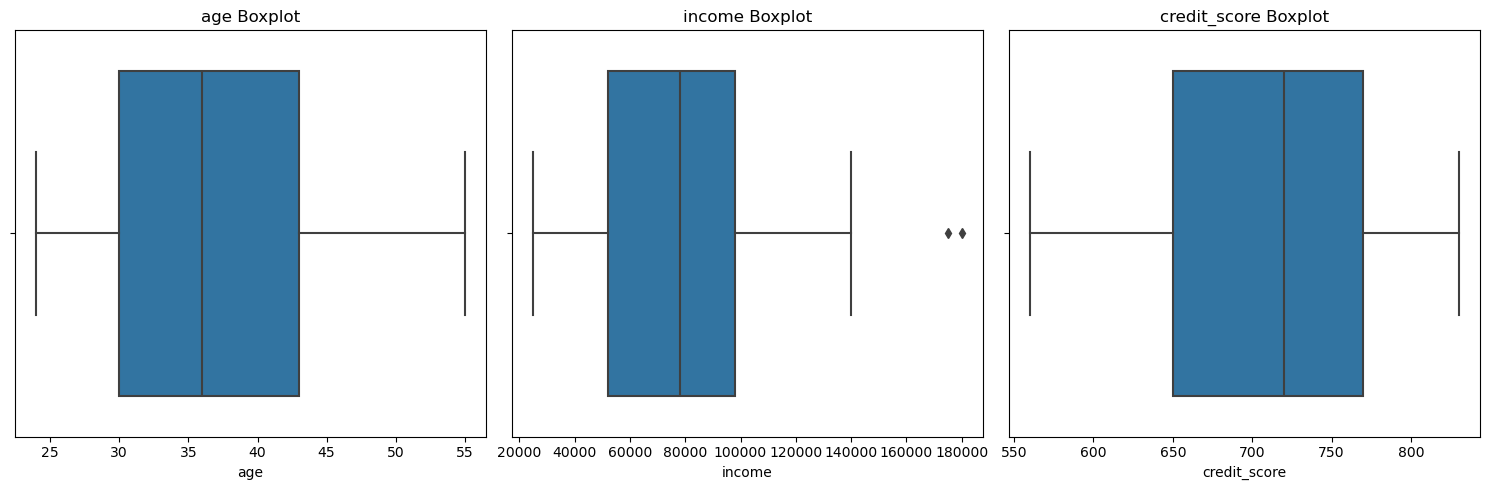

In [423]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()


Dots outside the whiskers (lines extending from the box) represent potential outliers, helping to identify extreme values in the data distribution.

## 3) Scatter Plot
To check relationship between two feautres

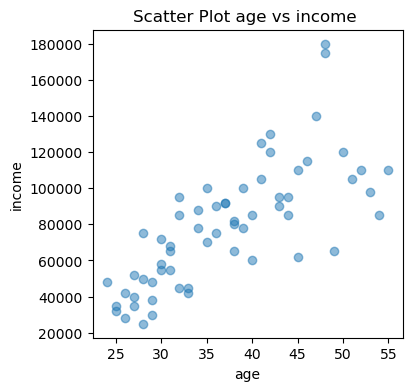

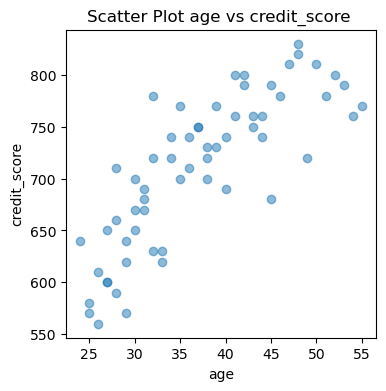

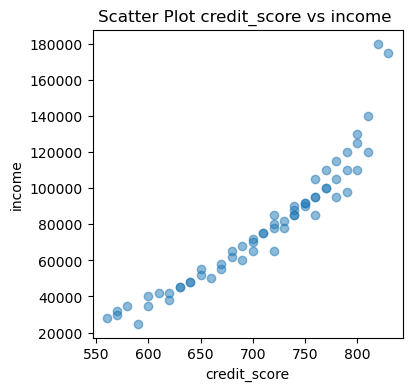

In [424]:
plt.figure(figsize=(4, 4))
plt.scatter(df['age'], df['income'], alpha=0.5)
plt.xlabel('age')
plt.ylabel('income')
plt.title('Scatter Plot age vs income ')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df['age'], df['credit_score'], alpha=0.5)
plt.xlabel('age')
plt.ylabel('credit_score')
plt.title('Scatter Plot age vs credit_score ')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df['credit_score'], df['income'], alpha=0.5)
plt.xlabel('credit_score')
plt.ylabel('income')
plt.title('Scatter Plot credit_score vs income ')
plt.show()


Income vs credit_score has linear relationships , means if one tends to increase other also increases

## 4) Pairwise Plot
Pairplot displays pairwise relationships between all numerical features in your dataset.

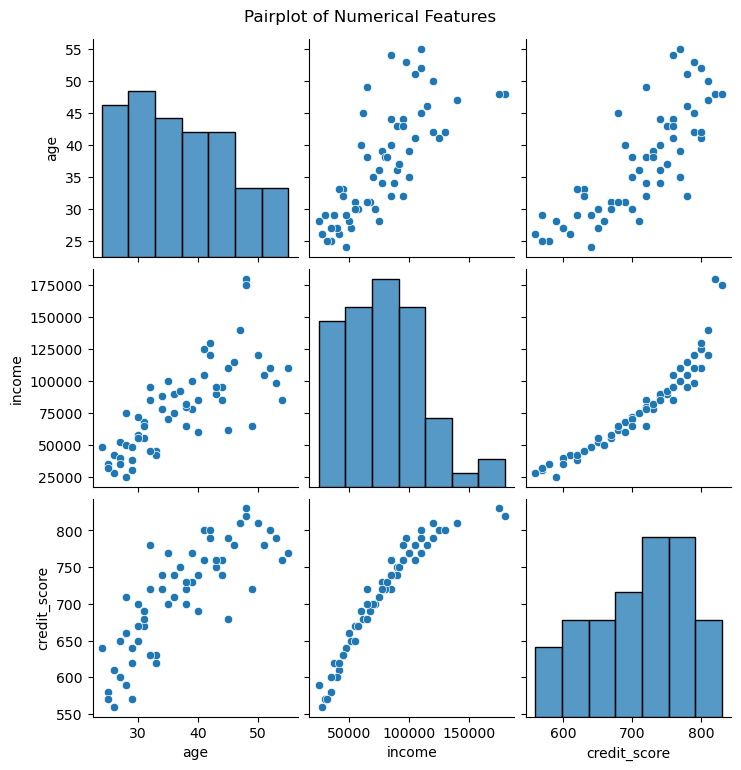

In [425]:
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


## Summary of Differences Scatter Plot VS Pairwise Plot

Scope:

Scatter Plot: Focuses on the relationship between two specific variables.
Pair Plot: Shows relationships among all pairs of a selected set of variables.
Visualization:

Scatter Plot: Single plot for two variables.
Pair Plot: Grid of plots showing all pairwise combinations of variables.
Usage:

Scatter Plot: Ideal for in-depth analysis of the relationship between two specific variables.
Pair Plot: Ideal for exploratory data analysis (EDA) to get an overall sense of the relationships among multiple variables.
Diagonal:

Scatter Plot: No diagonal component.
Pair Plot: Diagonal often contains histograms or KDE plots showing the distribution of each individual variable.
By using both scatter plots and pair plots, you can gain a detailed and comprehensive understanding of the relationships within your dataset.

 ## 5) Line Plot
A line plot is useful for visualizing trends in numerical features over time or an ordered sequence.

## 6) Violin Plot

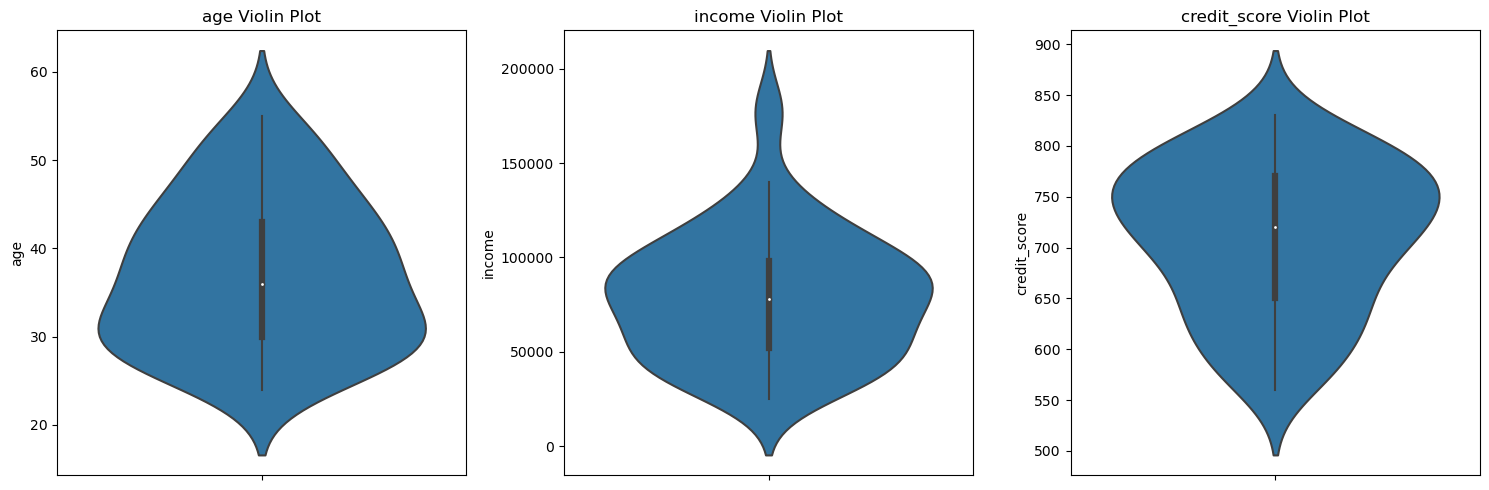

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'income', 'credit_score']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=df[feature])
    plt.title(f'{feature} Violin Plot')
plt.tight_layout()
plt.show()


## NUMERICAL FEAUTRES VS TARGET VARIABLE USING BOX PLOT

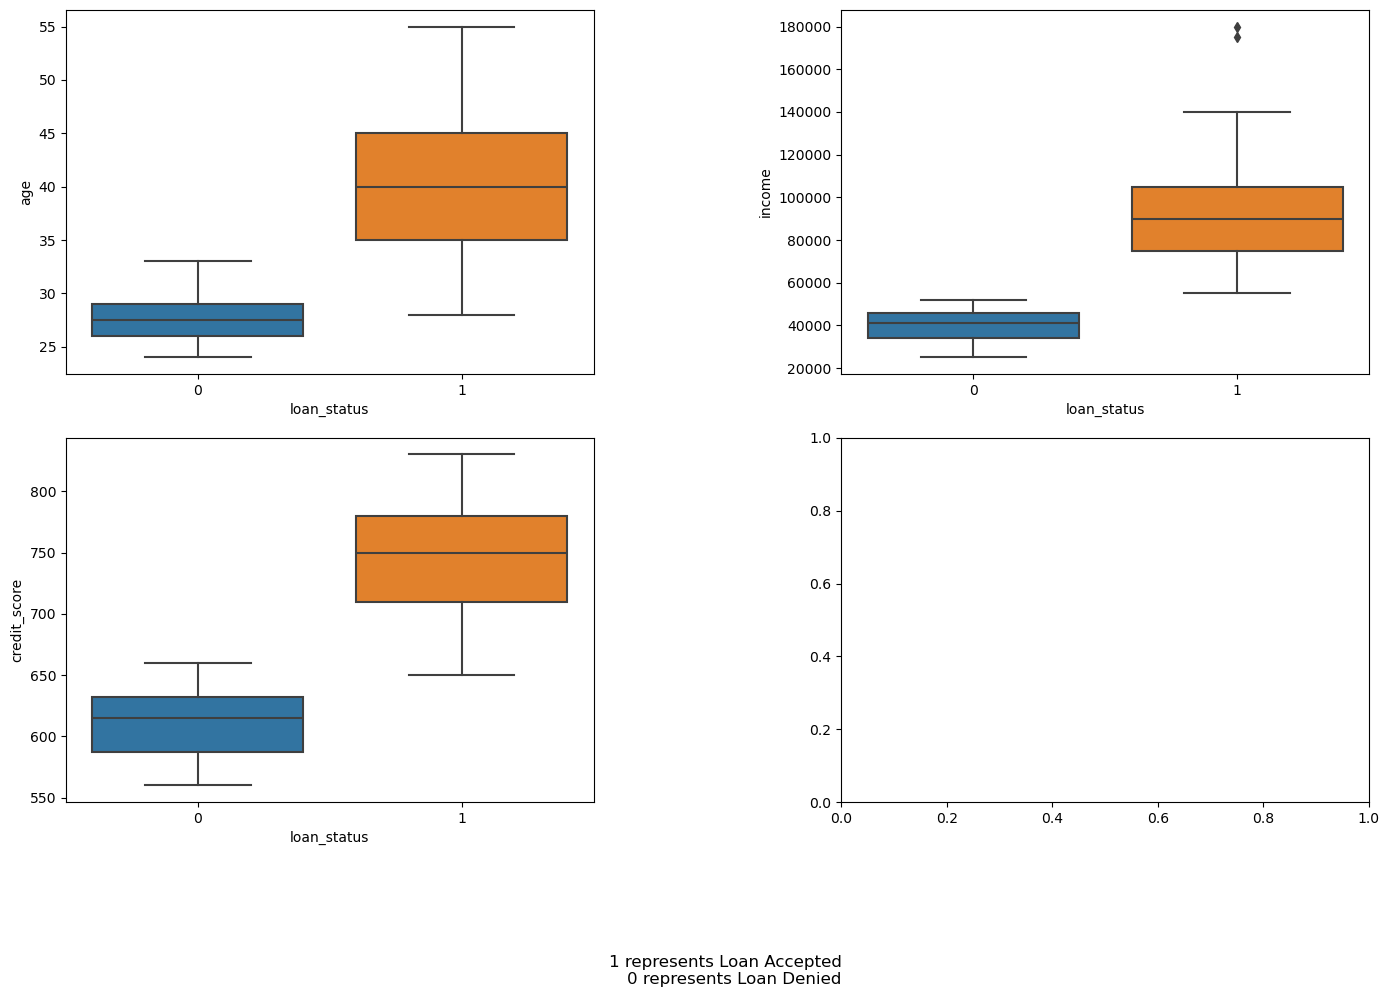

In [427]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='loan_status', y='age', data=df, ax=axes[0, 0])
sns.boxplot(x='loan_status', y='income', data=df, ax=axes[0, 1])
sns.boxplot(x='loan_status', y='credit_score', data=df, ax=axes[1, 0])
plt.text(0, -0.5, "1 represents Loan Accepted\n0 represents Loan Denied", ha='right', fontsize=12)
# Adjust layout
plt.tight_layout()
plt.show()


## --> Categorical Feautres

## 1) Count Plot 
Counts the no of values for every categories 

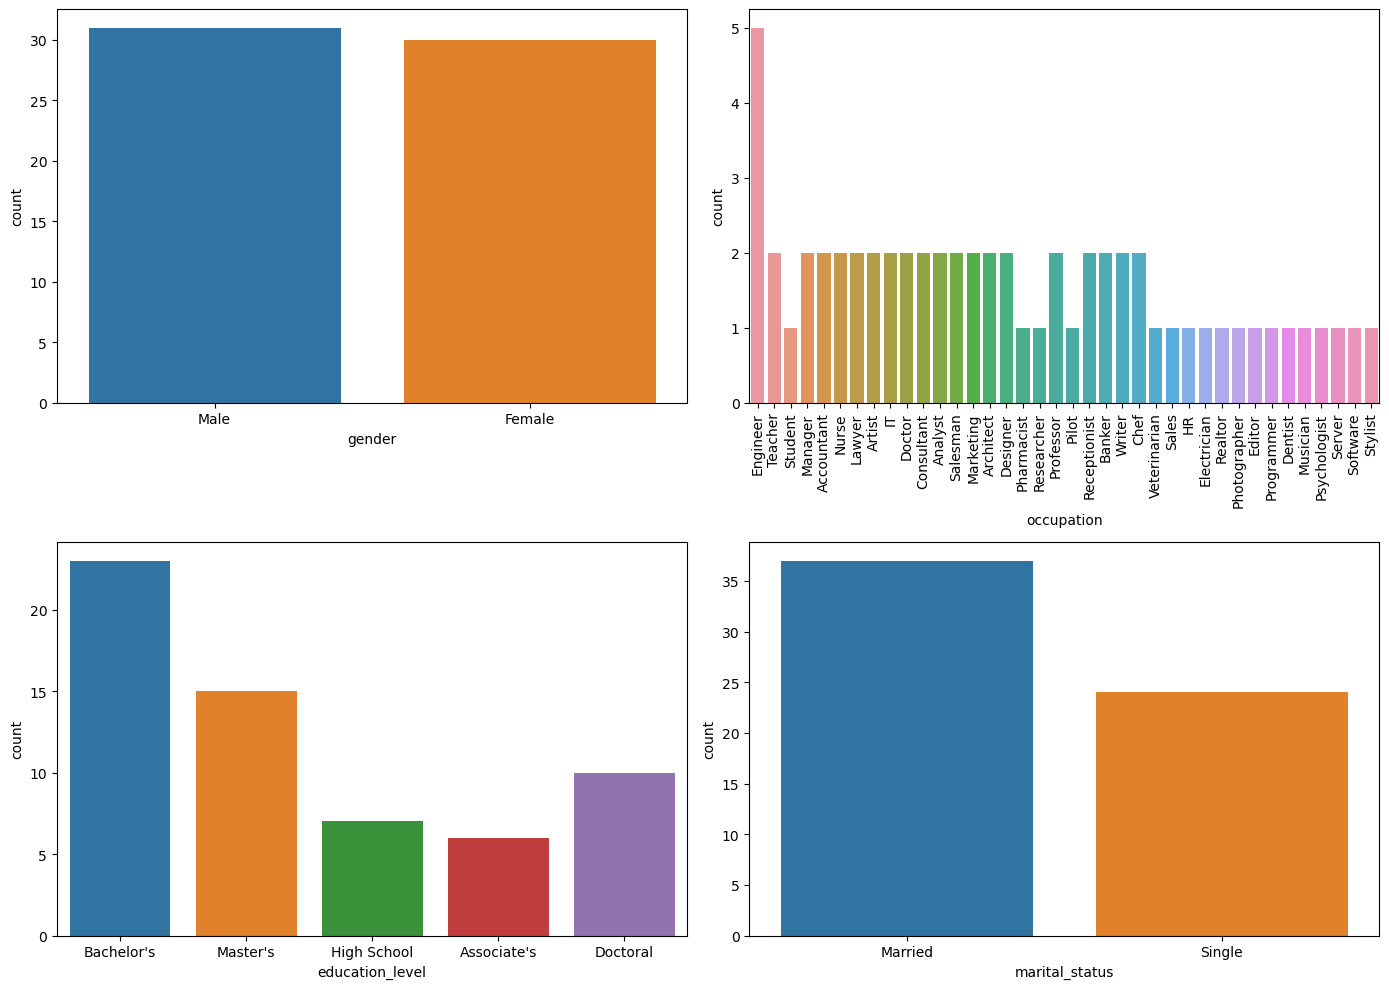

In [428]:
import pandas as pd
df_1=pd.read_csv(r"C:\Users\hp\Downloads\loan.csv")
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='gender', data=df_1, ax=axes[0, 0])
sns.countplot(x='occupation', data=df_1, ax=axes[0, 1])
sns.countplot(x='education_level', data=df_1, ax=axes[1, 0])
sns.countplot(x='marital_status', data=df_1, ax=axes[1, 1])

# Rotate x-ticks for occupation
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()



## 2) Bar Plot
Bar plot for each categorical variable against the target variable

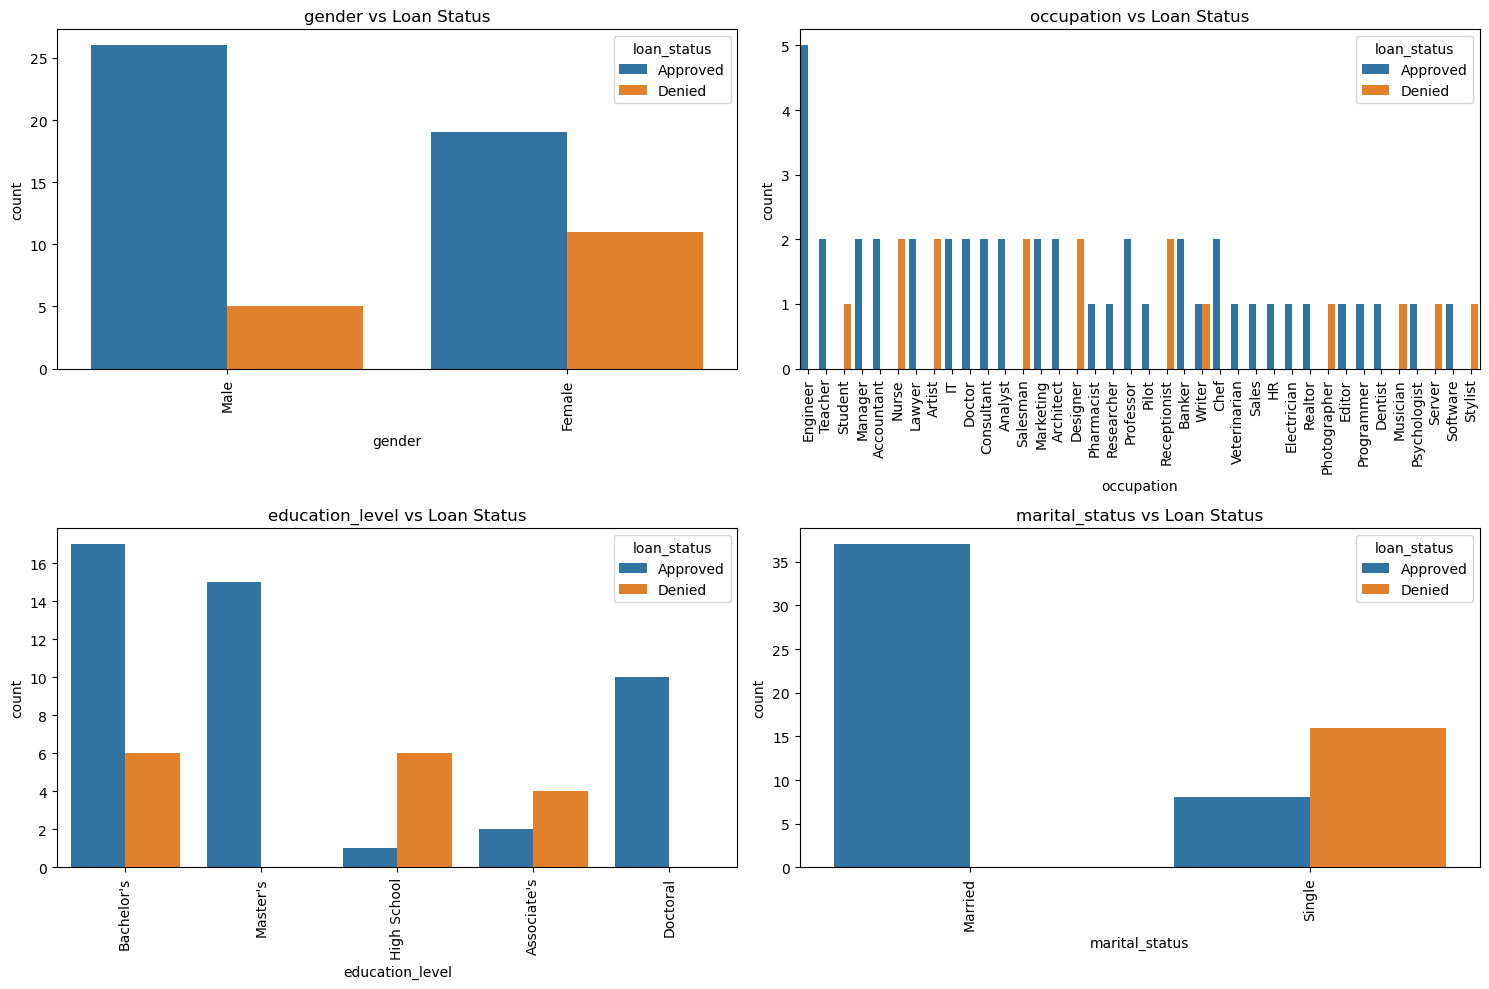

In [429]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='loan_status', data=df_1)
    plt.title(f'{feature} vs Loan Status')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## GROUP BY FUNCTION
Can be used with both categorical and numerical(with aggregate function)
The groupby function is important in data visualization because it facilitates data aggregation, comparison, pattern identification, insights generation, customized visualizations, and enhanced communication. Knowing when to use groupby depends on the specific analysis objectives and the nature of the dataset, but it is a valuable tool for exploring and understanding data in various contexts.

## Grouping eductaion level with respect to gender

In [430]:

category_counts_1 = df_1.groupby(['gender', 'education_level']).size().unstack(fill_value=0)
category_counts_1 

education_level,Associate's,Bachelor's,Doctoral,High School,Master's
gender,,,,,
Female,3,9,8,3,7
Male,3,14,2,4,8


<Figure size 1000x600 with 0 Axes>

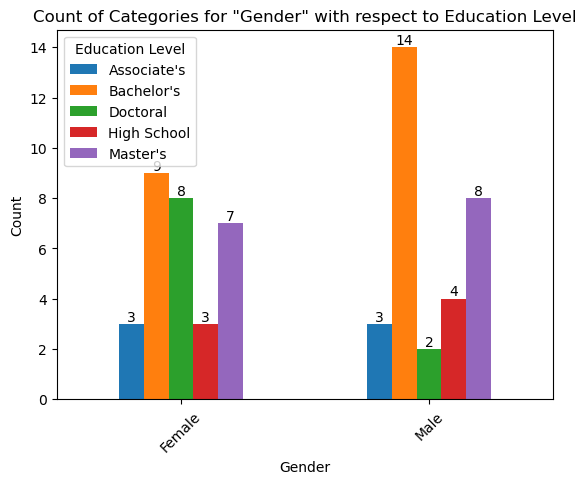

In [431]:
plt.figure(figsize=(10, 6))
ax = category_counts_1.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Categories for "Gender" with respect to Education Level')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Education Level")
plt.xticks(rotation=45)
plt.show()

## Grouping gender with respect to loan status 

In [432]:
category_counts_2 = df_1.groupby(['gender', 'loan_status']).size().unstack(fill_value=0)
category_counts_2 

loan_status,Approved,Denied
gender,,
Female,19,11
Male,26,5


<Figure size 1000x600 with 0 Axes>

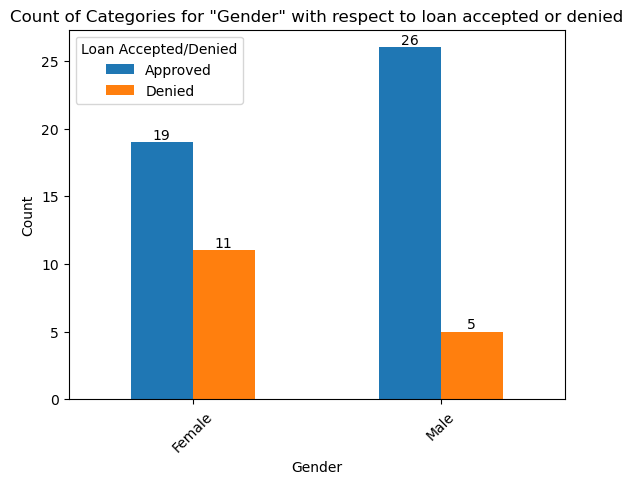

In [433]:
plt.figure(figsize=(10, 6))
ax = category_counts_2.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Categories for "Gender" with respect to loan accepted or denied')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Loan Accepted/Denied")
plt.xticks(rotation=45)
plt.show()

## Grouping gender with respect to the mean of credit score

In [434]:
grouped_data = df_1.groupby('gender')['credit_score'].mean()
grouped_data

gender
Female    701.666667
Male      717.741935
Name: credit_score, dtype: float64

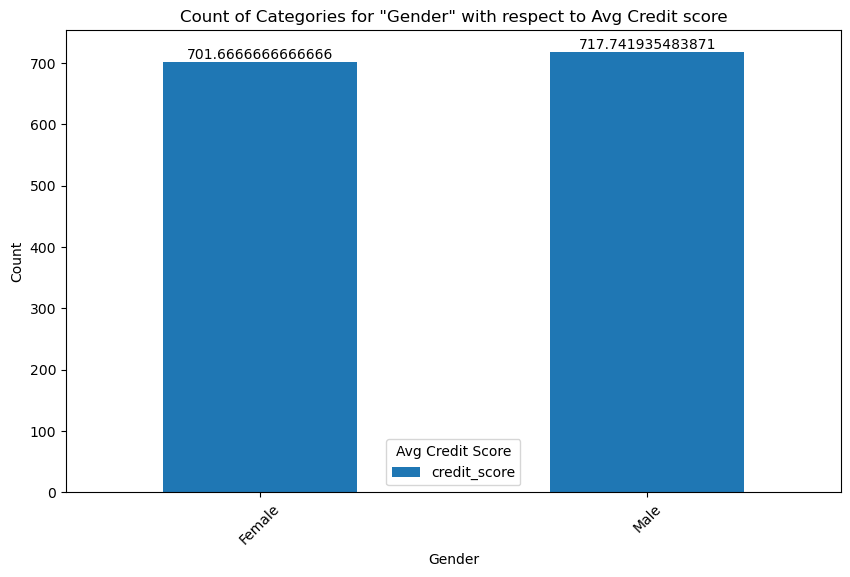

In [435]:
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Categories for "Gender" with respect to Avg Credit score')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Avg Credit Score")
plt.xticks(rotation=45)
plt.show()

## Grouping Occupation with respect to education level only for male categories

In [446]:
rows=df_1[df_1["gender"]=='Male']
rows

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
6,42,Male,Lawyer,Doctoral,Married,120000,790,Approved
8,37,Male,IT,Master's,Married,92000,750,Approved
10,55,Male,Consultant,Master's,Married,110000,770,Approved
12,26,Male,Salesman,High School,Single,42000,610,Denied
14,44,Male,Architect,Master's,Married,95000,760,Approved
16,34,Male,Engineer,Bachelor's,Married,88000,740,Approved
18,30,Male,Researcher,Master's,Single,72000,700,Approved


In [447]:
category_counts_3 = rows.groupby(['occupation', 'education_level']).size().unstack(fill_value=0)
category_counts_3 

education_level,Associate's,Bachelor's,Doctoral,High School,Master's
occupation,,,,,
Accountant,0,2,0,0,0
Analyst,0,1,0,0,0
Architect,0,0,0,0,2
Banker,0,1,0,0,1
Chef,2,0,0,0,0
Consultant,0,0,0,0,2
Electrician,0,0,0,1,0
Engineer,0,3,0,0,1
IT,0,1,0,0,1


<Figure size 1000x2000 with 0 Axes>

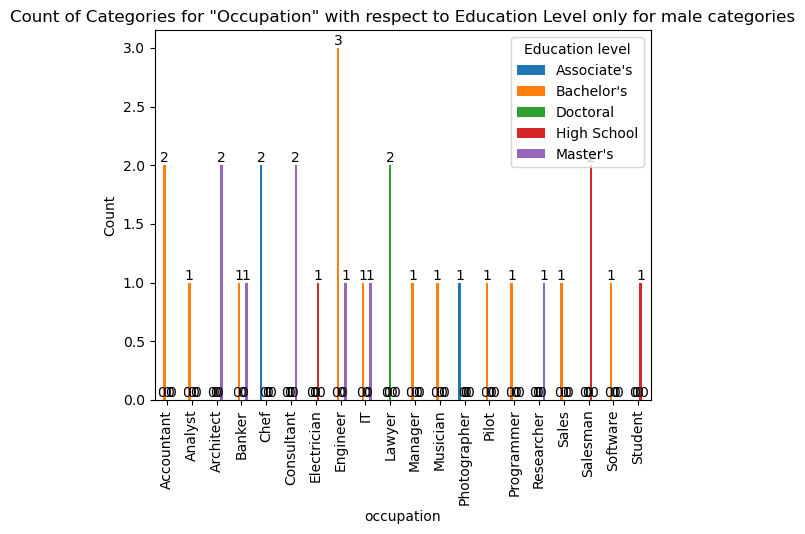

In [454]:
plt.figure(figsize=(10, 20))
ax = category_counts_3.plot(kind='bar', stacked=False)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Count of Categories for "Occupation" with respect to Education Level only for male categories')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Education level")
plt.xticks(rotation=90)
plt.show()